# **Práctica 13: Agrupamiento Jerárquico**


En esta práctica vamos a aplicar el algoritmo de agrupamiento jerárquico aglomerativo sobre un conjunto de datos de clientes de un centro comercial. El objetivo es segmentar a los clientes en grupos (clústeres) basándonos en dos variables clave:

- Ingresos anuales (k$)

- Índice de gasto (Spending Score)

Para lograrlo, se sigue una serie de pasos que incluyen la carga y preprocesamiento de los datos, la visualización del dendrograma para determinar el número óptimo de grupos, la aplicación del modelo de clustering y la visualización de los resultados en un gráfico de dispersión.

Este tipo de análisis es muy útil en entornos de marketing, ya que permite identificar perfiles de consumidores similares y adaptar estrategias comerciales de manera más efectiva. La técnica utilizada combina la distancia euclidiana con el método de enlace de Ward, ideal para minimizar la varianza dentro de los clústeres.

## **Carga de datos**

Se carga un archivo CSV que contiene datos de clientes de un centro comercial. Para este análisis se utilizarán únicamente dos variables: **Ingresos Anuales** (`Annual Income (k$)`) e **Índice de Gastos** (`Spending Score (1-100)`), que representan el poder adquisitivo y el comportamiento de gasto.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [19]:
# cargar los datos
clientes = pd.read_csv('Mall_Customers.csv')

# seleccion de variables
X = clientes[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## **Dendrograma para encontrar número óptimo de clústeres**


El dendrograma permite visualizar cómo se agrupan jerárquicamente los clientes. Para ello se usa el método de enlace de Ward, que minimiza la varianza dentro de cada clúster.


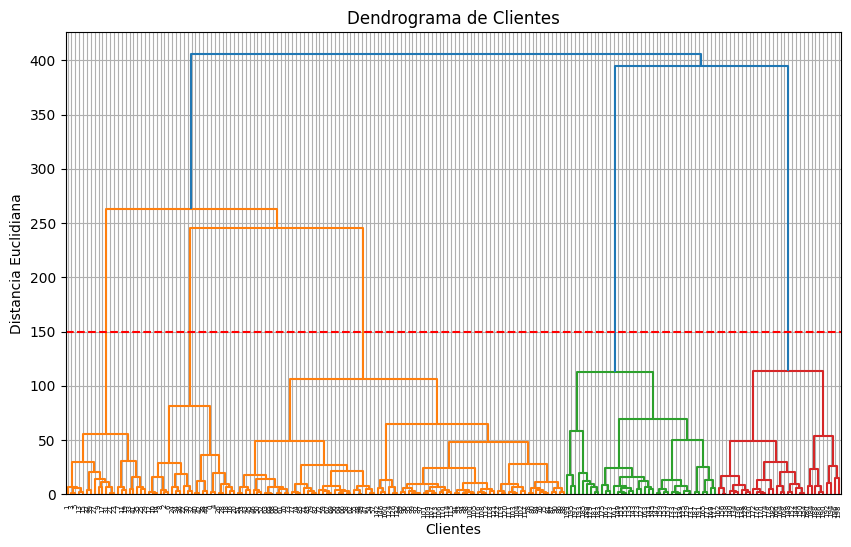

In [29]:
# Dendrograma
plt.figure(figsize=(10, 6))
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrograma de Clientes")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclidiana")
plt.axhline(y=150, color='r', linestyle='--')  # Línea guía visual
plt.grid(True)
plt.show()

La línea roja a altura = 150. Por qué:

La línea corta el dendrograma en 5 ramas principales, es decir, 5 clústeres antes de que se unan las grandes estructuras.

Si la linea subiera, por ejemplo a 250, obtendría solo 3 clústeres y perdería detalle.

Si la bajara demasiado, tendría muchos grupos pequeños que no aportarían información útil.

## **Agrupamiento jerárquico**

Usamos el algoritmo aglomerativo con el número de clústeres detectado en el dendrograma. Se utilizará la distancia euclidiana y el método de enlace 'ward'.


In [31]:
# Ajustar n_clusters según el dendrograma (k=5 según dendrograma)
model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clientes['cluster'] = model.fit_predict(X)

In [33]:
# Mostrar una muestra
clientes[['Annual Income (k$)', 'Spending Score (1-100)', 'cluster']].head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


## **Visualización de clústeres**

Se genera un diagrama de dispersión para observar cómo se agrupan los clientes según sus ingresos y su índice de gastos. Cada clúster se representa con un color diferente.


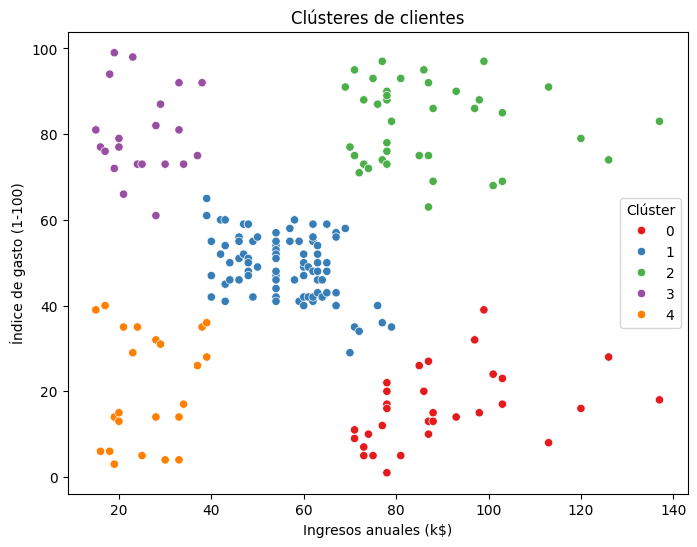

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='cluster', palette='Set1', data=clientes
)
plt.title("Clústeres de clientes")
plt.xlabel("Ingresos anuales (k$)")
plt.ylabel("Índice de gasto (1-100)")
plt.legend(title='Clúster')
plt.show()

## **Conclusiones del Agrupamiento Jerárquico (Clustering)**

1. Selección de variables
Para este análisis utilizamos dos variables clave: los ingresos anuales y el índice de gastos de los clientes. Estas variables son representativas del comportamiento de compra y nos permiten identificar patrones relevantes de consumo.

2. Determinación del número óptimo de clústeres
A través del dendrograma generado con el método de enlace de Ward, identificamos una distancia de corte adecuada (≈150) que nos permite visualizar claramente cinco grandes grupos de clientes antes de unirse a otros. Esta elección está respaldada visualmente por la separación entre ramas del dendrograma.

3. Resultados del agrupamiento
El algoritmo de clustering jerárquico aglomerativo clasificó exitosamente a los clientes en 5 clústeres diferenciados, agrupándolos según similitudes en su nivel de ingreso y hábitos de gasto.

4. Visualización clara
El diagrama de dispersión muestra cómo se distribuyen los clientes en el espacio formado por las dos variables. Cada grupo presenta características distintas:
  - Un grupo de ingresos bajos y gasto bajo.
  - Un grupo de ingresos bajos y gasto alto.
  - Un grupo intermedio.
  - Un grupo de ingresos altos y gasto bajo.
  - Un grupo de ingresos altos y gasto alto.

5. Utilidad práctica
Este tipo de análisis parece muy útil para estrategias de marketing segmentado. Cada grupo de clientes podría recibir promociones o campañas adaptadas a su perfil económico y de consumo, aumentando así la eficacia de las acciones comerciales del centro.
